# **Project Overview**: Titanic - Will They Survive?

## **Goal**: Predict whether a passenger survived the Titanic disaster based on features like age, gender, class, etc.

### 1. Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from IPython.display import display, HTML
import joblib

### 2. Load and Inspect Dataset

In [2]:
# Load the Titanic dataset from GitHub
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [3]:
# Preview the first 5 rows
print("🔍 First 5 rows:")
print(df.head())

🔍 First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   N

In [4]:
# Shape of the dataset
print("\n📏 Shape of the dataset:", df.shape)


📏 Shape of the dataset: (891, 12)


In [5]:
# Count missing values
print("\n🧼 Missing values:")
print(df.isnull().sum())


🧼 Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Info about data types
print("\nℹ️ Dataset info:")
df.info()


ℹ️ Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 3. Data Preprocessing

In [7]:
# 1. Drop unused columns
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [8]:
# 2. Fill missing 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# 3. Fill missing 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-8-0606e371bb06>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-8-0606e371bb06>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [9]:
# 4. Convert 'Sex' and 'Embarked' to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [10]:
# Preview cleaned data
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


### 4. Data Splitting

In [11]:
# 1. Separate features and target
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']               # Target

# 2. Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5. Model Training

In [12]:
# Train Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)  # Extended max_iter to avoid warnings
logreg_model.fit(X_train, y_train)
logreg_acc = accuracy_score(y_test, logreg_model.predict(X_test))

print(f"✅ Logistic Regression Accuracy: {logreg_acc:.4f}")

✅ Logistic Regression Accuracy: 0.8101


In [13]:
# Train Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_acc = accuracy_score(y_test, tree_model.predict(X_test))

print(f"🌳 Decision Tree Accuracy: {tree_acc:.4f}")

🌳 Decision Tree Accuracy: 0.7821


In [14]:
# Train Random Forest
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)
forest_acc = accuracy_score(y_test, forest_model.predict(X_test))

print(f"🌲 Random Forest Accuracy: {forest_acc:.4f}")

🌲 Random Forest Accuracy: 0.8212


In [15]:
# Train KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_acc = accuracy_score(y_test, knn_model.predict(X_test))

print(f"👥 KNN Accuracy: {knn_acc:.4f}")

👥 KNN Accuracy: 0.6983


In [16]:
# --- SCALE features for SVM ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)
svm_acc = accuracy_score(y_test, svm_model.predict(X_test_scaled))

print(f"🧮 SVM Accuracy: {svm_acc:.4f}")

🧮 SVM Accuracy: 0.8212


In [17]:
# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_acc = accuracy_score(y_test, xgb_model.predict(X_test))

print(f"⚡ XGBoost Accuracy: {xgb_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:52:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


⚡ XGBoost Accuracy: 0.8212


### 6. Feature Importance Inspection

<ipython-input-18-fd3b2ee13d03>:17: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


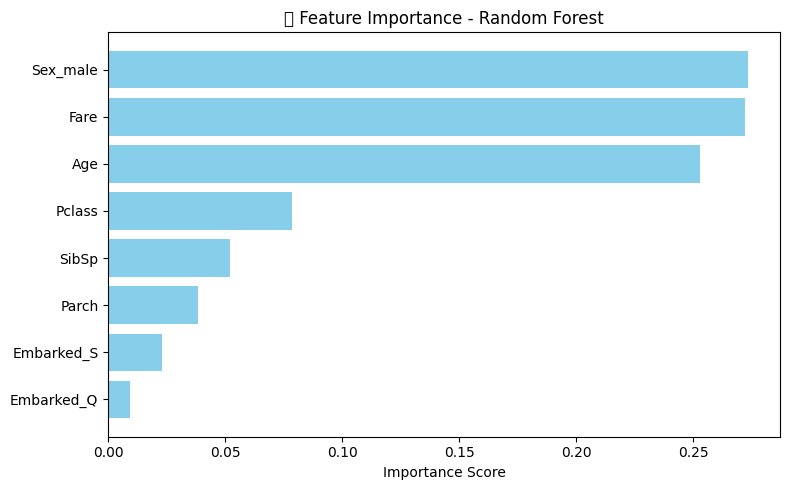

In [18]:
# Get the feature importances from the model using Random Forest
importances = forest_model.feature_importances_
features = X_train.columns

# Create a DataFrame to display and sort them
feat_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(8, 5))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.title('🔍 Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

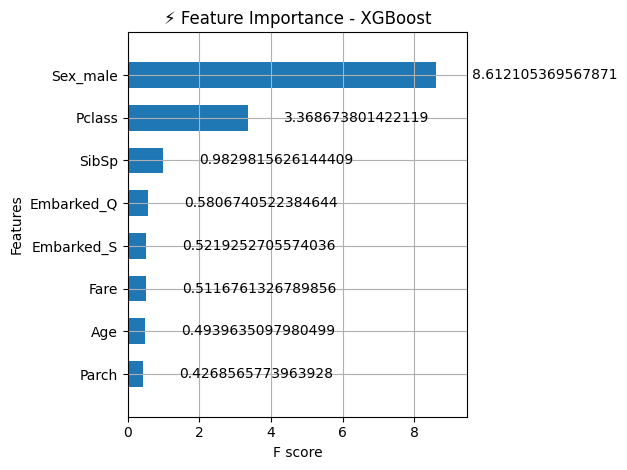

In [19]:
# Plot feature importance using XGBoost's built-in function
plot_importance(xgb_model, height=0.6, max_num_features=10, importance_type='gain')
plt.title('⚡ Feature Importance - XGBoost')
plt.tight_layout()
plt.show()

### 7. Model Evaluation

In [20]:
# List of pre-trained models
models = {
    "Logistic Regression": logreg_model,
    "Decision Tree": tree_model,
    "Random Forest": forest_model,
    "KNN": knn_model,
    "SVM": svm_model,
    "XGBoost": xgb_model
}

# Apply cross-validation to each model
cv_results = {}
for name, model in models.items():
    # Cross-validation for each model using the accuracy scoring method
    cv_results[name] = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

# Display cross-validation results
for model_name, accuracy in cv_results.items():
    print(f"{model_name}: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:52:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:52:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:52:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:52:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:52:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Logistic Regression: 0.7907
Decision Tree: 0.7473
Random Forest: 0.7950
KNN: 0.6840
SVM: 0.6671
XGBoost: 0.7978


Evaluating Logistic Regression...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating KNN...
Evaluating SVM...
Evaluating XGBoost...


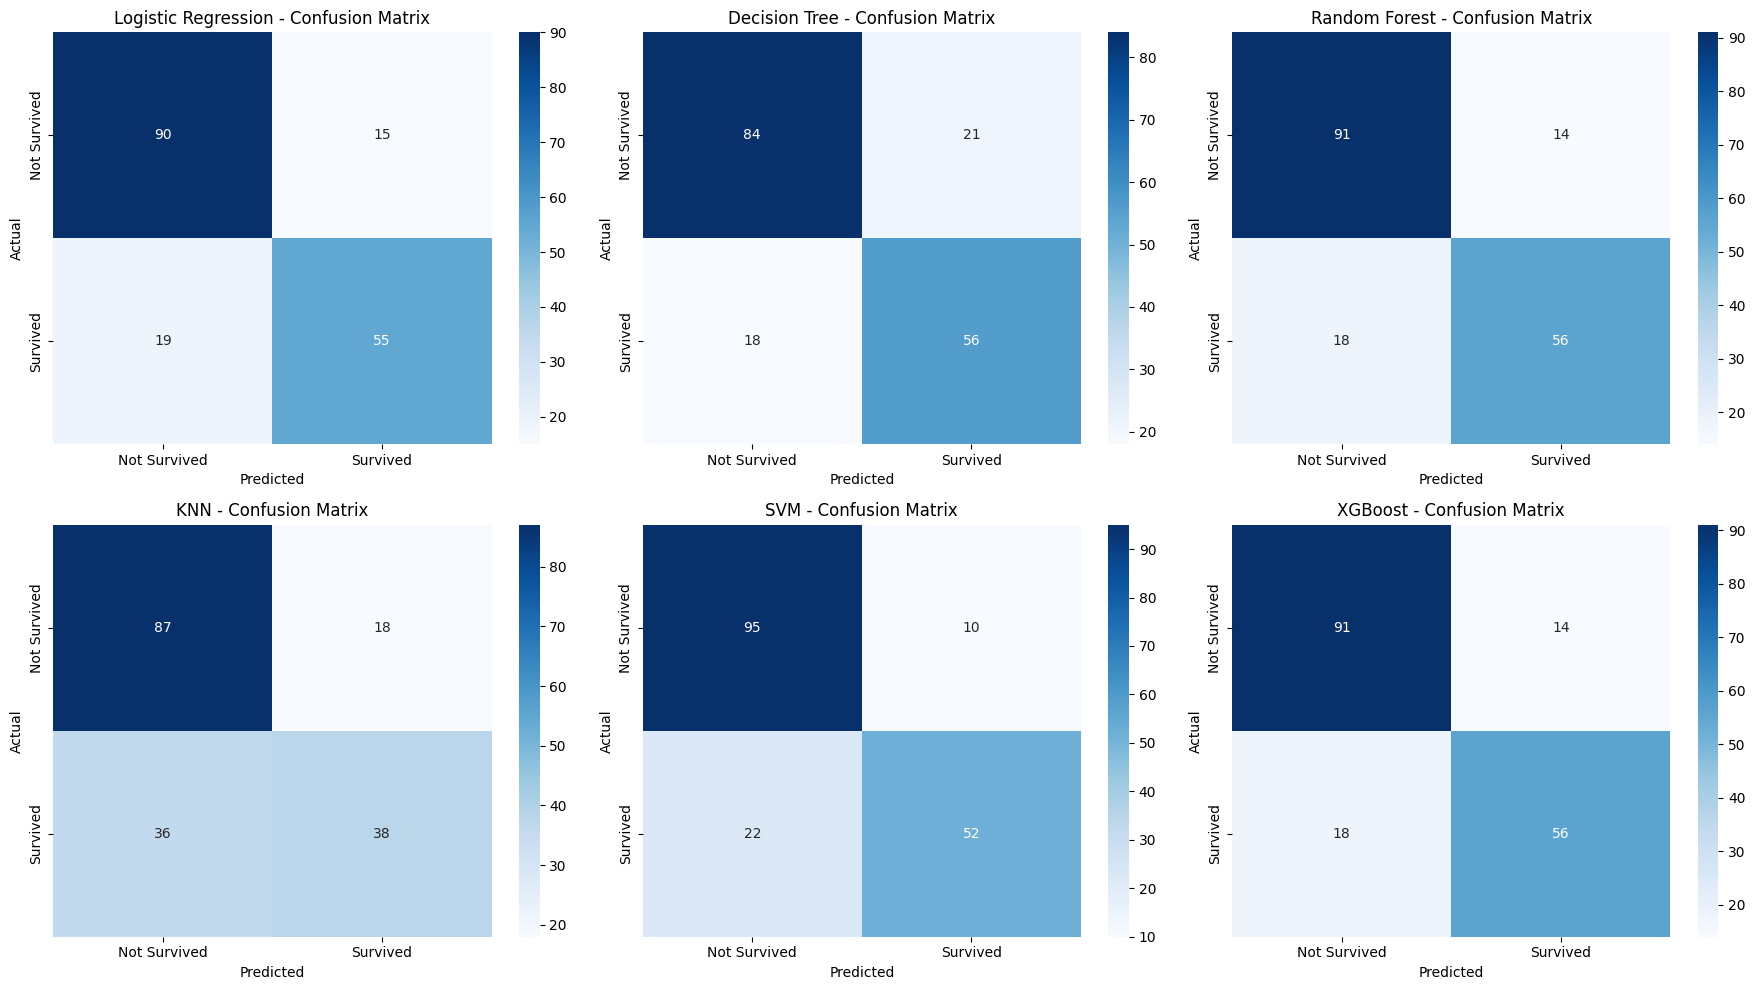

In [21]:
# Create a 2x3 grid to plot all the confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop over each model to evaluate
for i, (model_name, model) in enumerate(models.items()):
    print(f"Evaluating {model_name}...")

    # Use scaled test set ONLY for SVM
    if model_name == "SVM":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot Confusion Matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Not Survived', 'Survived'],
                yticklabels=['Not Survived', 'Survived'],
                ax=axes[i])
    axes[i].set_title(f"{model_name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [22]:
# Let's assume these are the predictions and true labels for a specific model
# (you should replace these with actual model predictions and true labels)
y_true = y_test  # Actual values (ground truth)
y_pred_logreg = logreg_model.predict(X_test)  # Predictions from Logistic Regression
y_pred_tree = tree_model.predict(X_test)  # Predictions from Decision Tree
y_pred_forest = forest_model.predict(X_test)  # Predictions from Random Forest
y_pred_knn = knn_model.predict(X_test)  # Predictions from KNN
y_pred_svm = svm_model.predict(X_test_scaled)  # Predictions from SVM
y_pred_xgb = xgb_model.predict(X_test)  # Predictions from XGBoost


# Function to extract relevant metrics from classification report
def extract_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    precision_class_0 = report['0']['precision']
    precision_class_1 = report['1']['precision']
    recall_class_0 = report['0']['recall']
    recall_class_1 = report['1']['recall']
    f1_class_0 = report['0']['f1-score']
    f1_class_1 = report['1']['f1-score']

    return {
        "Precision (Class 0)": precision_class_0,
        "Precision (Class 1)": precision_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1,
        "F1-Score (Class 0)": f1_class_0,
        "F1-Score (Class 1)": f1_class_1
    }

# Fetch the classification metrics for each model
metrics_logreg = extract_metrics(y_true, y_pred_logreg)
metrics_tree = extract_metrics(y_true, y_pred_tree)
metrics_forest = extract_metrics(y_true, y_pred_forest)
metrics_knn = extract_metrics(y_true, y_pred_knn)
metrics_svm = extract_metrics(y_true, y_pred_svm)
metrics_xgb = extract_metrics(y_true, y_pred_xgb)

# Combine all metrics into a DataFrame
data = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "KNN", "SVM", "XGBoost"],
    "Precision (Class 0)": [metrics_logreg["Precision (Class 0)"], metrics_tree["Precision (Class 0)"], metrics_forest["Precision (Class 0)"], metrics_knn["Precision (Class 0)"], metrics_svm["Precision (Class 0)"], metrics_xgb["Precision (Class 0)"]],
    "Precision (Class 1)": [metrics_logreg["Precision (Class 1)"], metrics_tree["Precision (Class 1)"], metrics_forest["Precision (Class 1)"], metrics_knn["Precision (Class 1)"], metrics_svm["Precision (Class 1)"], metrics_xgb["Precision (Class 1)"]],
    "Recall (Class 0)": [metrics_logreg["Recall (Class 0)"], metrics_tree["Recall (Class 0)"], metrics_forest["Recall (Class 0)"], metrics_knn["Recall (Class 0)"], metrics_svm["Recall (Class 0)"], metrics_xgb["Recall (Class 0)"]],
    "Recall (Class 1)": [metrics_logreg["Recall (Class 1)"], metrics_tree["Recall (Class 1)"], metrics_forest["Recall (Class 1)"], metrics_knn["Recall (Class 1)"], metrics_svm["Recall (Class 1)"], metrics_xgb["Recall (Class 1)"]],
    "F1-Score (Class 0)": [metrics_logreg["F1-Score (Class 0)"], metrics_tree["F1-Score (Class 0)"], metrics_forest["F1-Score (Class 0)"], metrics_knn["F1-Score (Class 0)"], metrics_svm["F1-Score (Class 0)"], metrics_xgb["F1-Score (Class 0)"]],
    "F1-Score (Class 1)": [metrics_logreg["F1-Score (Class 1)"], metrics_tree["F1-Score (Class 1)"], metrics_forest["F1-Score (Class 1)"], metrics_knn["F1-Score (Class 1)"], metrics_svm["F1-Score (Class 1)"], metrics_xgb["F1-Score (Class 1)"]],
}

# Create a DataFrame
df_classification_report = pd.DataFrame(data)

# Display the custom table with IPython display for more flexibility
display(HTML(df_classification_report.to_html(index=False)))

Model,Precision (Class 0),Precision (Class 1),Recall (Class 0),Recall (Class 1),F1-Score (Class 0),F1-Score (Class 1)
Logistic Regression,0.825688,0.785714,0.857143,0.743243,0.841121,0.763889
Decision Tree,0.823529,0.727273,0.800000,0.756757,0.811594,0.741722
Random Forest,0.834862,0.800000,0.866667,0.756757,0.850467,0.777778
KNN,0.707317,0.678571,0.828571,0.513514,0.763158,0.584615
SVM,0.811966,0.838710,0.904762,0.702703,0.855856,0.764706
XGBoost,0.834862,0.800000,0.866667,0.756757,0.850467,0.777778


### 8. Model Saving and Column Checking

In [23]:
# Save the model to a file
joblib.dump(forest_model, 'titanic_model.joblib')

['titanic_model.joblib']

In [24]:
# This assumes the training dataset is available
print(X.columns)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')
